## Test everything with only lexica based approach

In [1]:
import pandas as pd
from textblob import TextBlob

In [2]:
# Preprocess text (username and link placeholders)
def preprocess(text):

    # emojis entfernen
    #text = ersetze_emojis(text)

    # lemmatizer = WordNetLemmatizer()
    # words = text.split()
    # lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    # text = ' '.join(lemmatized_words)


    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

In [3]:
# Laden Sie Ihren CSV-Datensatz
csv_file = "../../data/val_data.csv"  # Ersetzen Sie durch den Pfad zu Ihrer CSV-Datei
df = pd.read_csv(csv_file)

# Leere Listen zum Speichern der vorhergesagten Sentiments und der tatsächlichen Labels
predicted_sentiments = []
actual_labels = []

count = 0
# Durchlaufen Sie jeden Eintrag im DataFrame und wenden Sie das Modell an
for index, row in df.iterrows():
    text = row['text']
    text = preprocess(text)
    blob = TextBlob(text)
    score = blob.sentiment.polarity
    if (score > 0.10):
        predicted_label_id = 2
        # Speichern Sie das vorhergesagte Sentiment und das tatsächliche Label
        predicted_sentiments.append(predicted_label_id)
        actual_labels.append(row['label'])
    elif (score < -0.10):
        predicted_label_id = 0
        # Speichern Sie das vorhergesagte Sentiment und das tatsächliche Label
        predicted_sentiments.append(predicted_label_id)
        actual_labels.append(row['label'])
    else:
        predicted_label_id = 1
        # Speichern Sie das vorhergesagte Sentiment und das tatsächliche Label
        predicted_sentiments.append(predicted_label_id)
        actual_labels.append(row['label'])
    

# Fügen Sie die vorhergesagten Sentiments und die tatsächlichen Labels als neue Spalten zum DataFrame hinzu
df['predicted_sentiment'] = predicted_sentiments

# Vergleichen Sie die vorhergesagten Sentiments mit den tatsächlichen Labels
correct_predictions = (df['predicted_sentiment'] == df['label']).sum()
total_predictions = len(df)

# Berechnen Sie die Genauigkeit (Accuracy) der Vorhersagen
accuracy = correct_predictions / total_predictions

# Drucken Sie die Genauigkeit
print(f"Genauigkeit: {accuracy:.2%}")


Genauigkeit: 52.25%


In [4]:
df.head()

,text,label,predicted_sentiment
0,Dark Souls 3 April Launch Date Confirmed With ...,1,2
1,"""National hot dog day, national tequila day, t...",2,2
2,When girls become bandwagon fans of the Packer...,0,0
3,@user I may or may not have searched it up on ...,1,1
4,Here's your starting TUESDAY MORNING Line up a...,1,1


In [5]:
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Ihre Verwirrungsmatrix
conf_matrix = confusion_matrix(df['label'], df['predicted_sentiment'])

# Berechnen Sie die Precision und den Recall für jede Klasse
precision = precision_score(df['label'], df['predicted_sentiment'], average=None)
recall = recall_score(df['label'], df['predicted_sentiment'], average=None)

# Berechnen Sie den gewichteten Durchschnitt von Precision und Recall (Macro-Durchschnitt)
macro_precision = precision_score(df['label'], df['predicted_sentiment'], average='macro')
macro_recall = recall_score(df['label'], df['predicted_sentiment'], average='macro')

# Erstellen Sie ein DataFrame für die Verwirrungsmatrix
confusion_df = pd.DataFrame(conf_matrix, columns=["Predicted Class 0", "Predicted Class 1", "Predicted Class 2"], index=["True Class 0", "True Class 1", "True Class 2"])

# Drucken Sie die Verwirrungsmatrix
print("Verwirrungsmatrix:")
print(confusion_df)

# Erstellen Sie ein DataFrame für Precision und Recall
precision_recall_df = pd.DataFrame({"Precision": precision, "Recall": recall}, index=["Class 0", "Class 1", "Class 2"])

# Drucken Sie die Precision und den Recall für jede Klasse
print("\nPrecision und Recall pro Klasse:")
print(precision_recall_df)

# Drucken Sie den gewichteten Durchschnitt von Precision und Recall (Macro-Durchschnitt)
print(f"\nMacro Precision: {macro_precision:.2f}")
print(f"Macro Recall: {macro_recall:.2f}")


Verwirrungsmatrix:
              Predicted Class 0  Predicted Class 1  Predicted Class 2
True Class 0                109                142                 61
True Class 1                154                443                272
True Class 2                 51                275                493

Precision und Recall pro Klasse:
         Precision    Recall
Class 0   0.347134  0.349359
Class 1   0.515116  0.509781
Class 2   0.596852  0.601954

Macro Precision: 0.49
Macro Recall: 0.49


In [6]:
precision_recall_df

,Precision,Recall
Class 0,0.347134,0.349359
Class 1,0.515116,0.509781
Class 2,0.596852,0.601954


In [7]:
confusion_df

,Predicted Class 0,Predicted Class 1,Predicted Class 2
True Class 0,109,142,61
True Class 1,154,443,272
True Class 2,51,275,493


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc




In [9]:
# Verwirrungsmatrizen in DataFrames umwandeln
data = {
    'Model': ['XLM', 'RoBERTa', 'BERTweet', 'Lyxuan', 'TextBlob'],
    'True Class 0': [275, 241, 263, 144, 109],
    'Predicted Class 0': [275, 241, 263, 144, 109],
    'True Class 1': [185, 116, 67, 51, 154],
    'Predicted Class 1': [27, 65, 43, 166, 142],
    'True Class 2': [32, 15, 4, 12, 51],
    'Predicted Class 2': [10, 6, 6, 2, 61]
}

df = pd.DataFrame(data)

# ROC-Kurven berechnen und plotten
plt.figure(figsize=(10, 6))

for index, row in df.iterrows():
    true_labels = np.array([row['True Class 0'], row['True Class 1'], row['True Class 2']])
    predicted_scores = np.array([row['Predicted Class 0'], row['Predicted Class 1'], row['Predicted Class 2']])
    fpr, tpr, _ = roc_curve(true_labels, predicted_scores)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{row["Model"]} (AUC = {roc_auc:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Models')
plt.legend(loc='best')
plt.grid(True)
plt.show()

ValueError: multiclass format is not supported

<Figure size 1000x600 with 0 Axes>

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/

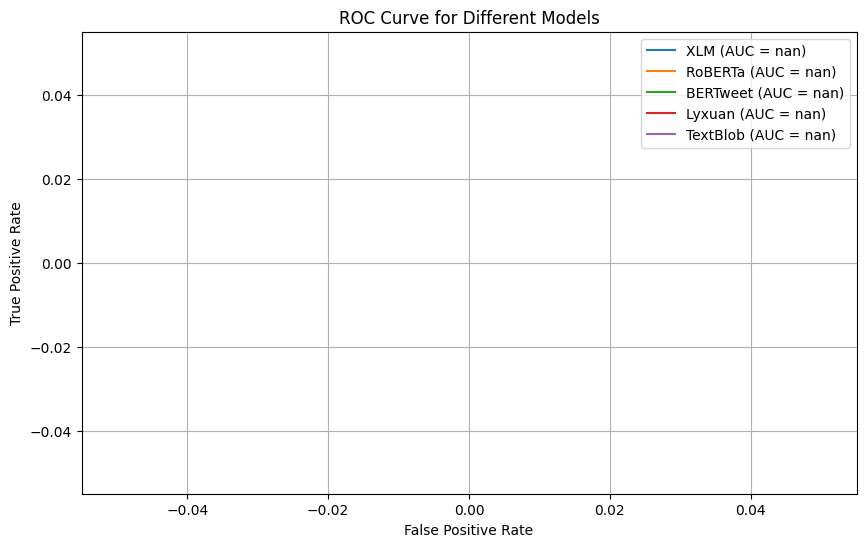

In [11]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = {
    'Model': ['XLM', 'RoBERTa', 'BERTweet', 'Lyxuan', 'TextBlob'],
    'True Class 0': [275, 241, 263, 144, 109],
    'Predicted Class 0': [275, 241, 263, 144, 109],
    'True Class 1': [185, 116, 67, 51, 154],
    'Predicted Class 1': [27, 65, 43, 166, 142],
    'True Class 2': [32, 15, 4, 12, 51],
    'Predicted Class 2': [10, 6, 6, 2, 61]
}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))

for index, row in df.iterrows():
    true_labels = np.array([row['True Class 0'], row['True Class 1'], row['True Class 2']])
    predicted_scores = np.array([row['Predicted Class 0'], row['Predicted Class 1'], row['Predicted Class 2']])

    fpr, tpr, _ = roc_curve(true_labels, predicted_scores, pos_label=1)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{row["Model"]} (AUC = {roc_auc:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Models')
plt.legend(loc='best')
plt.grid(True)
plt.show()
